<a href="https://colab.research.google.com/github/snoop2head/KoGPT-Joong-2/blob/main/conditional_gpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration & Data Setting

In [ ]:
!nvidia-smi

Fri Dec 24 19:58:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    43W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install easydict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
shutil.copy("/content/drive/MyDrive/kogpt-joong-2-data/data/data_final_argmaxed.csv", "./")

'./data_final_argmaxed.csv'

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# DATA_PATH = "/content/drive/MyDrive/kogpt-joong-2-data/modeling"
# PSEUDO_LABELED_FILE_NAME = "data_labeld_KoBERT_unhand_argmaxed_and_감성대화말뭉치.csv"
PSEUDO_LABELED_FILE_PATH = "./data_final_argmaxed.csv"

In [ ]:
import os
# pseudo_path = os.path.join(DATA_PATH, PSEUDO_LABELED_FILE_NAME)
pseudo_path = PSEUDO_LABELED_FILE_PATH
df_pseudo = pd.read_csv(pseudo_path, encoding="utf-8")
df_pseudo.head()

,type,text,공포,놀람,분노,슬픔,중립,행복,혐오,first_emotion,first_logit,second_logit,second_emotion
0,대화,드디어 샀다.,-1.976455,-0.497756,-1.301128,-1.327810,1.069673,5.177046,-1.353732,행복,5.177046,1.069673,중립
1,대화,뭐 하고 놀까.,1.932847,-2.145293,-1.495267,2.116858,2.249198,-1.559769,-0.994669,중립,2.249198,2.116858,슬픔
2,대화,오늘은 지각 안했어!.,-1.364891,-0.819980,-1.040110,-2.304478,1.620021,5.133489,-1.207578,행복,5.133489,1.620021,중립
3,대화,오늘 점심 제육볶음 이래!.,-1.533068,-0.162358,-0.926851,-2.654852,2.069342,4.444376,-1.225262,행복,4.444376,2.069342,중립
4,대화,나 먼저 갈게.,-0.676803,-1.909779,-2.075403,0.887898,1.514351,4.160100,-2.037050,행복,4.160100,1.514351,중립


In [ ]:
df_pseudo.tail()

,type,text,공포,놀람,분노,슬픔,중립,행복,혐오,first_emotion,first_logit,second_logit,second_emotion
494091,노래 가사,눈물은 뚝 눈물은 뚝 얼싸 안고 춤을 춰보자 춘향아 춘향아 눈물을 거둬라,-1.791054,-2.507724,-0.895269,0.827443,3.551021,1.050611,-0.640308,중립,3.551021,1.050611,행복
494092,노래 가사,어차피 다 지난 일인걸 더 이상 무슨 말이 필요해 서둘지 말고 한걸음씩 즐겨봐,-2.078648,-1.968988,-2.018869,0.097698,3.121234,3.633747,-1.375754,행복,3.633747,3.121234,중립
494093,노래 가사,참 미안해 이제 그만 아프지 마 제발 힘들었지 떠나지마 참 미안해 이러지마,-0.457692,-0.860459,-0.770534,5.504443,-1.656590,-0.837802,-1.208101,슬픔,5.504443,-0.457692,공포
494094,노래 가사,내 못난 마음 꿈에서는 다 용서해 주세요,-0.706598,-2.820624,-1.454884,4.223856,0.895535,1.043546,-1.225848,슬픔,4.223856,1.043546,행복
494095,노래 가사,이 날이 오기 전에 난 어떻게 품는 줄 몰랐죠,1.442261,1.019177,-2.571514,3.298930,0.045752,0.175383,-3.429953,슬픔,3.298930,1.442261,공포


In [ ]:
print(df_pseudo.shape)

(494096, 13)


In [ ]:
df_pseudo["first_logit"] = df_pseudo["first_logit"].round(1)
df_pseudo["second_logit"] = df_pseudo["second_logit"].round(1)

In [ ]:
df_pseudo["train_text"] = \
  df_pseudo["first_logit"].astype(str) + "만큼 " + df_pseudo["first_emotion"].astype(str) + "감정인 문장이다. " +  \
  df_pseudo["second_logit"].astype(str) + "만큼 " + df_pseudo["second_emotion"].astype(str) + "감정인 문장이다. " +  \
  df_pseudo["text"].astype(str)
df_pseudo.head()

,type,text,공포,놀람,분노,슬픔,중립,행복,혐오,first_emotion,first_logit,second_logit,second_emotion,train_text
0,대화,드디어 샀다.,-1.976455,-0.497756,-1.301128,-1.327810,1.069673,5.177046,-1.353732,행복,5.2,1.1,중립,5.2만큼 행복감정인 문장이다. 1.1만큼 중립감정인 문장이다. 드디어 샀다.
1,대화,뭐 하고 놀까.,1.932847,-2.145293,-1.495267,2.116858,2.249198,-1.559769,-0.994669,중립,2.2,2.1,슬픔,2.2만큼 중립감정인 문장이다. 2.1만큼 슬픔감정인 문장이다. 뭐 하고 놀까.
2,대화,오늘은 지각 안했어!.,-1.364891,-0.819980,-1.040110,-2.304478,1.620021,5.133489,-1.207578,행복,5.1,1.6,중립,5.1만큼 행복감정인 문장이다. 1.6만큼 중립감정인 문장이다. 오늘은 지각 안했어!.
3,대화,오늘 점심 제육볶음 이래!.,-1.533068,-0.162358,-0.926851,-2.654852,2.069342,4.444376,-1.225262,행복,4.4,2.1,중립,4.4만큼 행복감정인 문장이다. 2.1만큼 중립감정인 문장이다. 오늘 점심 제육볶음...
4,대화,나 먼저 갈게.,-0.676803,-1.909779,-2.075403,0.887898,1.514351,4.160100,-2.037050,행복,4.2,1.5,중립,4.2만큼 행복감정인 문장이다. 1.5만큼 중립감정인 문장이다. 나 먼저 갈게.


In [ ]:
df_pseudo.tail()

,type,text,공포,놀람,분노,슬픔,중립,행복,혐오,first_emotion,first_logit,second_logit,second_emotion,train_text
494091,노래 가사,눈물은 뚝 눈물은 뚝 얼싸 안고 춤을 춰보자 춘향아 춘향아 눈물을 거둬라,-1.791054,-2.507724,-0.895269,0.827443,3.551021,1.050611,-0.640308,중립,3.6,1.1,행복,3.6만큼 중립감정인 문장이다. 1.1만큼 행복감정인 문장이다. 눈물은 뚝 눈물은 ...
494092,노래 가사,어차피 다 지난 일인걸 더 이상 무슨 말이 필요해 서둘지 말고 한걸음씩 즐겨봐,-2.078648,-1.968988,-2.018869,0.097698,3.121234,3.633747,-1.375754,행복,3.6,3.1,중립,3.6만큼 행복감정인 문장이다. 3.1만큼 중립감정인 문장이다. 어차피 다 지난 일...
494093,노래 가사,참 미안해 이제 그만 아프지 마 제발 힘들었지 떠나지마 참 미안해 이러지마,-0.457692,-0.860459,-0.770534,5.504443,-1.656590,-0.837802,-1.208101,슬픔,5.5,-0.5,공포,5.5만큼 슬픔감정인 문장이다. -0.5만큼 공포감정인 문장이다. 참 미안해 이제 ...
494094,노래 가사,내 못난 마음 꿈에서는 다 용서해 주세요,-0.706598,-2.820624,-1.454884,4.223856,0.895535,1.043546,-1.225848,슬픔,4.2,1.0,행복,4.2만큼 슬픔감정인 문장이다. 1.0만큼 행복감정인 문장이다. 내 못난 마음 꿈에...
494095,노래 가사,이 날이 오기 전에 난 어떻게 품는 줄 몰랐죠,1.442261,1.019177,-2.571514,3.298930,0.045752,0.175383,-3.429953,슬픔,3.3,1.4,공포,3.3만큼 슬픔감정인 문장이다. 1.4만큼 공포감정인 문장이다. 이 날이 오기 전에...


In [ ]:
df_pseudo["train_text"] = df_pseudo["train_text"].str.replace("nan만큼 nan감정인 문장이다.", "")
df_pseudo.tail()

,type,text,공포,놀람,분노,슬픔,중립,행복,혐오,first_emotion,first_logit,second_logit,second_emotion,train_text
494091,노래 가사,눈물은 뚝 눈물은 뚝 얼싸 안고 춤을 춰보자 춘향아 춘향아 눈물을 거둬라,-1.791054,-2.507724,-0.895269,0.827443,3.551021,1.050611,-0.640308,중립,3.6,1.1,행복,3.6만큼 중립감정인 문장이다. 1.1만큼 행복감정인 문장이다. 눈물은 뚝 눈물은 ...
494092,노래 가사,어차피 다 지난 일인걸 더 이상 무슨 말이 필요해 서둘지 말고 한걸음씩 즐겨봐,-2.078648,-1.968988,-2.018869,0.097698,3.121234,3.633747,-1.375754,행복,3.6,3.1,중립,3.6만큼 행복감정인 문장이다. 3.1만큼 중립감정인 문장이다. 어차피 다 지난 일...
494093,노래 가사,참 미안해 이제 그만 아프지 마 제발 힘들었지 떠나지마 참 미안해 이러지마,-0.457692,-0.860459,-0.770534,5.504443,-1.656590,-0.837802,-1.208101,슬픔,5.5,-0.5,공포,5.5만큼 슬픔감정인 문장이다. -0.5만큼 공포감정인 문장이다. 참 미안해 이제 ...
494094,노래 가사,내 못난 마음 꿈에서는 다 용서해 주세요,-0.706598,-2.820624,-1.454884,4.223856,0.895535,1.043546,-1.225848,슬픔,4.2,1.0,행복,4.2만큼 슬픔감정인 문장이다. 1.0만큼 행복감정인 문장이다. 내 못난 마음 꿈에...
494095,노래 가사,이 날이 오기 전에 난 어떻게 품는 줄 몰랐죠,1.442261,1.019177,-2.571514,3.298930,0.045752,0.175383,-3.429953,슬픔,3.3,1.4,공포,3.3만큼 슬픔감정인 문장이다. 1.4만큼 공포감정인 문장이다. 이 날이 오기 전에...


# Load and Create Conditions for Dataset 

In [ ]:
import os
from datetime import datetime
from easydict import EasyDict

# Initialize configuration
CFG = EasyDict()

# Dataset Config as constants
ROOT_PATH = os.path.abspath(".")
CFG.DEBUG = False
CFG.num_workers = 4
CFG.train_batch_size = 42

# Train configuration
CFG.user_name = "snoop2head"
today = datetime.now().strftime("%m%d_%H:%M")
CFG.file_base_name = f"{CFG.user_name}_{today}"
CFG.model_dir = "skt/ko-gpt-trinity-1.2B-v0.5" # designate the model's name registered on huggingface: https://huggingface.co/skt/ko-gpt-trinity-1.2B-v0.5
CFG.max_token_length = 42
CFG.learning_rate = 5e-5
CFG.weight_decay = 5e-3 # https://paperswithcode.com/method/weight-decay

# training steps configurations
CFG.save_steps = 5000
CFG.early_stopping_patience = 5
CFG.warmup_steps = 500
CFG.logging_steps = 5000
evaluation_strategy = "steps"
CFG.evaluation_steps = 5000

# Directory configuration
CFG.result_dir = os.path.join(ROOT_PATH, "results")
CFG.saved_model_dir = os.path.join(ROOT_PATH, "best_models")
CFG.logging_dir = os.path.join(ROOT_PATH, "logs")
CFG.baseline_dir = os.path.join(ROOT_PATH, 'baseline-code')

print(CFG)

{'DEBUG': False, 'num_workers': 4, 'train_batch_size': 42, 'user_name': 'snoop2head', 'file_base_name': 'snoop2head_1224_20:00', 'model_dir': 'skt/ko-gpt-trinity-1.2B-v0.5', 'max_token_length': 42, 'learning_rate': 5e-05, 'weight_decay': 0.005, 'save_steps': 5000, 'early_stopping_patience': 5, 'warmup_steps': 500, 'logging_steps': 5000, 'evaluation_steps': 5000, 'result_dir': '/content/results', 'saved_model_dir': '/content/best_models', 'logging_dir': '/content/logs', 'baseline_dir': '/content/baseline-code'}


In [ ]:
os.mkdir(CFG.result_dir)
os.mkdir(CFG.saved_model_dir)
os.mkdir(CFG.logging_dir)
os.mkdir(CFG.baseline_dir)

In [ ]:
import random
import torch
import pandas as pd
import numpy as np

os.environ["TOKENIZERS_PARALLELISM"] = "true"
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

def seed_everything(seed) :
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) # if use multi-GPU
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)
seed_everything(42)

In [ ]:
import random
list_train_text = list(df_pseudo["train_text"])
random.choices(list_train_text, k = 100)

['4.1만큼 중립감정인 문장이다. 1.4만큼 행복감정인 문장이다. 남편과 나와의 인연을 생각하면 1950년대 중반쯤 고향풍경이 떠오른다',
 '5.1만큼 슬픔감정인 문장이다. 0.1만큼 중립감정인 문장이다. 모든 헤어짐에는 이유가 있다. 그 사람은 그 이유만으로 이미 죽은 사람이고',
 '4.6만큼 슬픔감정인 문장이다. 0.8만큼 행복감정인 문장이다. 그런 우리를 안타깝게, 그리고 서글프게 바라보시던 선생님은 결국 눈물을 보이고야 마셨다',
 '4.1만큼 중립감정인 문장이다. 0.5만큼 혐오감정인 문장이다. 실수란 것은 따지고 보면 성격과 관련이 깊다',
 '4.5만큼 슬픔감정인 문장이다. 1.6만큼 공포감정인 문장이다. 그래서 행복을 더 이상 깨닫지 못하는 것은 아닐는지',
 '3.6만큼 행복감정인 문장이다. 2.1만큼 놀람감정인 문장이다. 자야! 자야! 와 우노? 눈꺼풀 속에서 빛이 환했다',
 '3.6만큼 중립감정인 문장이다. 2.5만큼 혐오감정인 문장이다. 내한 가수가 국내 음방에서 1위해도 이렇게는 안할듯 아 너네도 그래미랑 빌보드 좋아하지',
 '4.1만큼 분노감정인 문장이다. 2.7만큼 슬픔감정인 문장이다. 아무리 생각해도 내 잘못이 아닌데 맞은 것에 대해 화가 나. 내 잘못이 아닌데도 왜 맞아야 하는지 모르겠어. 너무 답답해. 그 친구에게 가서 왜 때렸는지 물어봐야겠어. ',
 '5.0만큼 행복감정인 문장이다. 2.0만큼 중립감정인 문장이다. 내년에 또 만나요, 안녕!회장이 불편함 없이 대전터미널까지 택시를 대절해 줬다',
 '4.3만큼 분노감정인 문장이다. 1.5만큼 슬픔감정인 문장이다. 남자는 나이가 들수록 어려진다더니 남편은 내가 챙겨주지 않으면 아무것도 할 수 없어서 짜증 나. 남편을 챙겨주는 것이 어렵지 않지만 혼자서 아무것도 하지 않는 건 짜증 나. 너무 화가 나. 남편이 혼자서 할 수 있도록 해결책을 찾아봐야겠어. ',
 '3.5만큼 중립감정인 문장이다. 1.8만큼 행복감정인 문장이다. 사람의 본성에는 소멸되지 않은 신성이 남아있다

In [ ]:
# read txt file from line by line
def read_txt(path):
    with open(path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    return lines

# make sampling function from the list
def sampling(list_lines:list, n:int) -> list:
    # sampling
    list_lines = np.random.choice(list_lines, n)
    list_lines = list(list_lines)
    return list_lines

In [ ]:
# get proportion of sentences where length is between 1 and 52
min_char_length = 40
max_char_length = 120
list_to_use = list(filter(lambda x: len(x) > min_char_length and len(x) < max_char_length, list_train_text))

print(f"Length of dataset that is in between {min_char_length} and {max_char_length} is" , len(list_to_use))
print(f"This is {round(len(list_to_use) / len(list_train_text) * 100, 2)} % of total dataset")

n = 20
print(f"Below are {n} samples of data to use")
sampling(list_to_use, n)

Length of dataset that is in between 40 and 120 is 461329
This is 93.37 % of total dataset
Below are 20 samples of data to use


['4.8만큼 중립감정인 문장이다. -0.3만큼 행복감정인 문장이다. 나는 다다음 정거장에서 내린 후 터벅터벅 걸어서 의자에 풀썩 앉았다',
 '5.6만큼 행복감정인 문장이다. 1.8만큼 중립감정인 문장이다. 바못 님의 독서실의 밤 글쓰기에 대한 바못 님의 생각 잘 읽었습니다',
 '2.0만큼 중립감정인 문장이다. 1.7만큼 혐오감정인 문장이다. 겨울철 소나무는 누굴 사랑하길래 이 한파속에서 초록의 자세를 견지하는건지',
 '3.0만큼 중립감정인 문장이다. 2.5만큼 행복감정인 문장이다. 오늘도 결국 비... 바람불고 소나기쳐도 결국엔 비가 온다. 오늘따라 유난히 비소리 잘들리네~~',
 '3.7만큼 중립감정인 문장이다. 2.9만큼 행복감정인 문장이다. 아무도 놀리지 않고 함께 어울려 놀았다',
 '4.6만큼 중립감정인 문장이다. 1.4만큼 행복감정인 문장이다. 그 애의 이름 세 글자면 향을 설명할 수 있는 말이 충분했다',
 '1.5만큼 행복감정인 문장이다. 1.1만큼 슬픔감정인 문장이다. 그리고 우리 엄마는, 어떤 일이 있더라도 아침만큼은 꼭 먹어야 한다!고 주장하는 분이시다',
 '3.4만큼 중립감정인 문장이다. 1.0만큼 놀람감정인 문장이다. 그것은 나의 프랑스 가족도 예외는 아니었다',
 '3.4만큼 행복감정인 문장이다. 1.8만큼 놀람감정인 문장이다. 둘다 자알 생겨따^^',
 '3.5만큼 중립감정인 문장이다. 2.1만큼 슬픔감정인 문장이다. 나는 물고기고, 바다를 헤엄치면서 아플 수도 있다고',
 '3.8만큼 분노감정인 문장이다. 2.5만큼 혐오감정인 문장이다. 뭔 팬티같은걸 입혀놨어 따수운 옷 입히라고',
 '4.8만큼 슬픔감정인 문장이다. 1.3만큼 공포감정인 문장이다. 잠깐의 그런 생각들은 날 전혀 원치 않았던 갈등의 기로에 올려놨다',
 '6.2만큼 행복감정인 문장이다. 0.6만큼 중립감정인 문장이다. 구름 안에 있는 공기의 흐름이 너무 좋아서 기분 좋다',
 '3.1만큼 행복감정인 문장이다. 2.9만큼 슬픔감정인 문장이다. 감히 가늠할 수

In [ ]:
import re

stopwords = []

# make post_process function
def post_process(list_lines:list, stopwords) -> list:
    # remove \n
    removed_lines = [line.strip() for line in list_lines]

    # filter stopwords from the line item in list_lines using regex
    if len(stopwords) > 0:
        removed_lines = []
        for line in list_lines:
            for stopword in stopwords:
                line = re.sub(stopword, '', line)
            removed_lines.append(line)

    # remove newlines
    removed_lines = [sentence.replace('\n', '') for sentence in removed_lines]

    # strip whitespace
    removed_lines = [sentence.strip() for sentence in removed_lines]

    # remove one letter items
    removed_lines = [sentence for sentence in removed_lines if len(sentence) > 1]

    return removed_lines

list_post_processed = post_process(list_to_use, stopwords)
print(len(list_post_processed))

n = 10
sampling(list_post_processed, n)

461329


['6.0만큼 행복감정인 문장이다. -0.2만큼 놀람감정인 문장이다. 나는 그 고급스러운 분위기에 압도되고 말았다',
 '3.6만큼 슬픔감정인 문장이다. 1.2만큼 공포감정인 문장이다. 너를 뺀 모두가 너의 예정된 죽음을 알고 있다',
 '5.4만큼 슬픔감정인 문장이다. -0.2만큼 공포감정인 문장이다. 얼룩진 옆구리는 부종을 않는 아픔을 감추지 못하네요',
 '2.4만큼 공포감정인 문장이다. 1.4만큼 혐오감정인 문장이다. 그러고 보니 제법 잘되던 가게를 넘기고 떠난 전 주인의 의도가 미심쩍었다',
 '6.0만큼 행복감정인 문장이다. 1.0만큼 중립감정인 문장이다. 나는 편지 쓰는 일에 열심이었고 답장 받아 보는 일에 만족했다',
 '3.6만큼 슬픔감정인 문장이다. 2.6만큼 공포감정인 문장이다. 그래서 그 법이 나를 못 지켜줄 때가 있다',
 '2.6만큼 중립감정인 문장이다. 1.4만큼 놀람감정인 문장이다. 문득 새로운 미지의 세계를 찾아가는 길이 있으면 하는 터무니없는 생각에도 잠기게 한다',
 '2.7만큼 행복감정인 문장이다. 2.6만큼 슬픔감정인 문장이다. 날 보며 웃으시는 할머니를 한번이라도 마주 보며 활짝 웃을껄',
 '3.4만큼 중립감정인 문장이다. 2.1만큼 행복감정인 문장이다. 한참을 구경하다가 가격도 비싼 것 같지 않아 두 마리를 샀다',
 '3.5만큼 혐오감정인 문장이다. 2.2만큼 분노감정인 문장이다. 어머니의 가정에 대한 무책임은 충분히 지탄의 대상이 될 수 있다']

## Tokenize

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.4 MB 5.1 MB/s 
     |████████████████████████████████| 3.3 MB 66.0 MB/s 
     |████████████████████████████████| 596 kB 82.5 MB/s 
     |████████████████████████████████| 61 kB 633 kB/s 
     |████████████████████████████████| 895 kB 78.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!transformers-cli login

In [ ]:
from transformers import GPT2Tokenizer, PreTrainedTokenizerFast

# Load the Tokenizer: "Fast" means that the tokenizer code is written in Rust Lang
tokenizer = PreTrainedTokenizerFast.from_pretrained(
    CFG.model_dir,
    bos_token="<s>",
    eos_token="</s>",
    unk_token="<unk>",
    pad_token="<pad>",
    mask_token="<mask>",
)

Downloading:   0%|          | 0.00/109 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/731 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [ ]:
# get the length of the individual items in tokenized input_ids
tokenized_input_ids = tokenizer(list_post_processed).input_ids
tokenized_length = [len(item) for item in tokenized_input_ids]

90


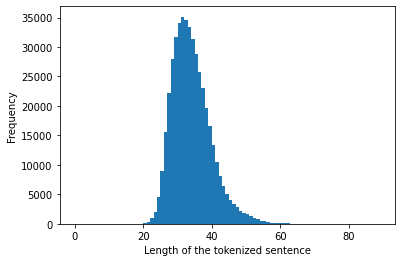

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# check the length distribution of the list with x ticks divided by 1 tokens
plt.hist(tokenized_length, bins=np.arange(0, max(tokenized_length)+1, 1))
print(max(tokenized_length)+1)
plt.xlabel("Length of the tokenized sentence")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# get proportion of sentences where length is between 0 and 32
min_token_length = 20
max_token_length = 42
list_between = list(filter(lambda x: x > min_token_length and x < max_token_length, tokenized_length))
print(len(list_between) , len(list_between) / len(list_to_use))

420599 0.9117115984470953


In [ ]:
# you can overwrite with the length you desire
max_token_length = 42
CFG.max_token_length = max_token_length

# Finetune Pretrained KoGPT Trinity GPTLM Model

In [ ]:
from transformers import GPT2Config

# set config and override with custom configuration
config = GPT2Config.from_pretrained(CFG.model_dir)
config

GPT2Config {
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 0,
  "embd_pdrop": 0.1,
  "eos_token_id": 8,
  "gradient_checkpointing": false,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 1920,
  "n_head": 16,
  "n_inner": 7680,
  "n_layer": 24,
  "n_positions": 1024,
  "pad_token_id": 8,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "transformers_version": "4.15.0",
  "use_cache": true,
  "vocab_size": 51200
}

In [ ]:
!nvidia-smi

Fri Dec 24 20:03:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    43W / 400W |      0MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from transformers import GPT2LMHeadModel

# Attach Language model Head to the pretrained GPT model
model = GPT2LMHeadModel.from_pretrained(CFG.model_dir) # KoGPT3 shares the same structure as KoGPT2. 

"""
**labels**: (`optional`) ``torch.LongTensor`` of shape ``(batch_size, sequence_length)``:
    Labels for language modeling.
    Note that the labels **are shifted** inside the model, i.e. you can set ``lm_labels = input_ids``
    Indices are selected in ``[-100, 0, ..., config.vocab_size]``
    All labels set to ``-100`` are ignored (masked), the loss is only
    computed for labels in ``[0, ..., config.vocab_size]``

Outputs: `Tuple` comprising various elements depending on the configuration (config) and inputs:
**loss**: (`optional`, returned when ``labels`` is provided) ``torch.FloatTensor`` of shape ``(1,)``:
    Language modeling loss.
**prediction_scores**: ``torch.FloatTensor`` of shape ``(batch_size, sequence_length, config.vocab_size)``
    Prediction scores of the language modeling head (scores for each vocabulary token before SoftMax).
**past**:
    list of ``torch.FloatTensor`` (one for each layer) of shape ``(2, batch_size, num_heads, sequence_length, embed_size_per_head)``:
    that contains pre-computed hidden-states (key and values in the attention blocks).
    Can be used (see `past` input) to speed up sequential decoding. The token ids which have their past given to this model
    should not be passed as input ids as they have already been computed.
**hidden_states**: (`optional`, returned when ``config.output_hidden_states=True``)
    list of ``torch.FloatTensor`` (one for the output of each layer + the output of the embeddings)
    of shape ``(batch_size, sequence_length, hidden_size)``:
    Hidden-states of the model at the output of each layer plus the initial embedding outputs.
**attentions**: (`optional`, returned when ``config.output_attentions=True``)
    list of ``torch.FloatTensor`` (one for each layer) of shape ``(batch_size, num_heads, sequence_length, sequence_length)``:
    Attentions weights after the attention softmax, used to compute the weighted average in the self-attention heads.

Examples::

    import torch
    from transformers import GPT2Tokenizer, GPT2LMHeadModel

    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
    model = GPT2LMHeadModel.from_pretrained('gpt2')

    input_ids = torch.tensor(tokenizer.encode("Hello, my dog is cute", add_special_tokens=True)).unsqueeze(0)  # Batch size 1
    outputs = model(input_ids, labels=input_ids)
    loss, logits = outputs[:2]

"""

Downloading:   0%|          | 0.00/4.35G [00:00<?, ?B/s]

'\n**labels**: (`optional`) ``torch.LongTensor`` of shape ``(batch_size, sequence_length)``:\n    Labels for language modeling.\n    Note that the labels **are shifted** inside the model, i.e. you can set ``lm_labels = input_ids``\n    Indices are selected in ``[-100, 0, ..., config.vocab_size]``\n    All labels set to ``-100`` are ignored (masked), the loss is only\n    computed for labels in ``[0, ..., config.vocab_size]``\n\nOutputs: `Tuple` comprising various elements depending on the configuration (config) and inputs:\n**loss**: (`optional`, returned when ``labels`` is provided) ``torch.FloatTensor`` of shape ``(1,)``:\n    Language modeling loss.\n**prediction_scores**: ``torch.FloatTensor`` of shape ``(batch_size, sequence_length, config.vocab_size)``\n    Prediction scores of the language modeling head (scores for each vocabulary token before SoftMax).\n**past**:\n    list of ``torch.FloatTensor`` (one for each layer) of shape ``(2, batch_size, num_heads, sequence_length, embed

In [ ]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
     |████████████████████████████████| 97 kB 9.0 MB/s 
     |████████████████████████████████| 180 kB 82.7 MB/s 
     |████████████████████████████████| 140 kB 87.7 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=20c31bd5173f22afc5a751b4700bb27555a8fcfa4dc8aa15ef004db6a46f1ce4
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=074b5525665f4d5043573bf7b3565b122736262f71f76a810b51188be953620b
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [ ]:
import torch

# move the model to device
if torch.cuda.is_available() and CFG.DEBUG == False:
    device = torch.device("cuda:0")
elif CFG.DEBUG == True:
    device = torch.device("cpu")

print(f"current device that is training on: {device}")
model = model.to(device)
model.train()

current device that is training on: cuda:0


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(51200, 1920)
    (wpe): Embedding(1024, 1920)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((1920,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1920,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((1920,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
     

In [ ]:
!nvidia-smi

Fri Dec 24 20:05:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    48W / 400W |   6550MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# https://huggingface.co/transformers/custom_datasets.html
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    """ CustomDataset class for poetic sentences """
    def __init__(self, list_dataset, tokenizer):

        self.list_dataset = list_dataset
        self.tokenizer = tokenizer
        self.tokenized_sentences = self.tokenizer(
            list_dataset,
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=CFG.max_token_length,
            add_special_tokens=True,
            return_token_type_ids=False,
            )

    def __getitem__(self, idx):
        encoded_dict = {key: val[idx] for key, val in self.tokenized_sentences.items()}
        encoded_dict["labels"] = encoded_dict["input_ids"].clone() # gpt has same labels as input_ids: https://github.com/huggingface/notebooks/blob/master/examples/language_modeling.ipynb
        return encoded_dict

    def __len__(self):
        return len(self.list_dataset)


In [ ]:
kor_poetic_dataset = CustomDataset(list_post_processed, tokenizer)
# kor_poetic_eval_dataset = CustomDataset(list_post_processed[:5000], tokenizer)
print(len(kor_poetic_dataset))
# print(len(kor_poetic_eval_dataset))

461329


In [ ]:
import random
list_post_processed_eval = random.choices(list_train_text, k = 5000)
kor_poetic_eval_dataset = CustomDataset(list_post_processed_eval, tokenizer)

In [ ]:
print(kor_poetic_dataset[3])

{'input_ids': tensor([30106, 31922, 31299, 31970, 18808, 25981, 25824, 41460, 30085, 29992,
        30891, 31299, 38431, 18808, 25981, 25824, 41460, 30085, 30678, 37636,
        30004, 25737, 23134, 25780, 33928,   377,   390,     3,     3,     3,
            3,     3,     3,     3,     3,     3,     3,     3,     3,     3,
            3,     3]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 'labels': tensor([30106, 31922, 31299, 31970, 18808, 25981, 25824, 41460, 30085, 29992,
        30891, 31299, 38431, 18808, 25981, 25824, 41460, 30085, 30678, 37636,
        30004, 25737, 23134, 25780, 33928,   377,   390,     3,     3,     3,
            3,     3,     3,     3,     3,     3,     3,     3,     3,     3,
            3,     3])}


In [ ]:
from torch.nn import CrossEntropyLoss
from transformers.optimization import AdamW

CFG.learning_rate = 2e-5
# criterion = CrossEntropyLoss()
# optimizer = AdamW(model.parameters(), lr=CFG.learning_rate)

In [ ]:
# https://github.com/huggingface/transformers/blob/master/examples/pytorch/language-modeling/run_clm.py
from transformers import Trainer, TrainingArguments

CFG.num_epochs = 4
CFG.train_batch_size = 42
CFG.evaluation_steps = 1000

# https://huggingface.co/transformers/_modules/transformers/training_args.html
training_args = TrainingArguments(
    # train configs
    num_train_epochs=CFG.num_epochs,  # total number of training epochs
    per_device_train_batch_size=CFG.train_batch_size,  # batch size per device during training 
    per_device_eval_batch_size=CFG.train_batch_size,
    learning_rate=CFG.learning_rate,  # learning rate,
    # warmup_steps=CFG.warmup_steps,  # number of warmup steps for learning rate scheduler
    weight_decay=CFG.weight_decay,  # strength of weight decay
    
    # evaluating
    evaluation_strategy = "steps",
    eval_steps = CFG.evaluation_steps,
    load_best_model_at_end = True,
    metric_for_best_model = 'loss',
    
    # logging
    logging_steps=CFG.evaluation_steps,              # log saving step.
    logging_dir="./logs",  # directory for storing logs, 
    report_to="wandb",  # report to wandb
    run_name = 'kogpt-conditional',

    # save configs
    save_steps=CFG.evaluation_steps,
    output_dir="./results",  # output directory
    save_total_limit= 3,              # number of total save model.
)

# https://github.com/huggingface/transformers/blob/master/src/transformers/trainer.py
trainer = Trainer(
    model=model,  # the instantiated 🤗 Transformers model to be trained
    args=training_args,  # training arguments, defined above
    train_dataset=kor_poetic_dataset,  # training dataset, no evaluation dataset
    eval_dataset=kor_poetic_eval_dataset,  # evaluation dataset is same as training dataset
)

In [ ]:
!nvidia-smi

Fri Dec 24 20:07:56 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM4-40GB      Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    48W / 400W |   6710MiB / 40536MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
trainer.train()

***** Running training *****
  Num examples = 461329
  Num Epochs = 4
  Instantaneous batch size per device = 42
  Total train batch size (w. parallel, distributed & accumulation) = 42
  Gradient Accumulation steps = 1
  Total optimization steps = 43940
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss,Validation Loss
1000,1.887400,1.824687
2000,1.828900,1.777723
3000,1.808700,1.741976
4000,1.785200,1.701073
5000,1.769100,1.667463
6000,1.747000,1.632592
7000,1.731800,1.597418
8000,1.715500,1.564882
9000,1.692700,1.531193
10000,1.683400,1.506095


***** Running Evaluation *****
  Num examples = 5000
  Batch size = 42
Saving model checkpoint to ./results/checkpoint-1000
Configuration saved in ./results/checkpoint-1000/config.json
Model weights saved in ./results/checkpoint-1000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 5000
  Batch size = 42
Saving model checkpoint to ./results/checkpoint-2000
Configuration saved in ./results/checkpoint-2000/config.json
Model weights saved in ./results/checkpoint-2000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 5000
  Batch size = 42
Saving model checkpoint to ./results/checkpoint-3000
Configuration saved in ./results/checkpoint-3000/config.json
Model weights saved in ./results/checkpoint-3000/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 5000
  Batch size = 42
Saving model checkpoint to ./results/checkpoint-4000
Configuration saved in ./results/checkpoint-4000/config.json
Model weights saved in ./results/checkpoint-4000/pytorch_mo

Step,Training Loss,Validation Loss
1000,1.887400,1.824687
2000,1.828900,1.777723
3000,1.808700,1.741976
4000,1.785200,1.701073
5000,1.769100,1.667463
6000,1.747000,1.632592
7000,1.731800,1.597418
8000,1.715500,1.564882
9000,1.692700,1.531193
10000,1.683400,1.506095


***** Running Evaluation *****
  Num examples = 5000
  Batch size = 42
Saving model checkpoint to ./results/checkpoint-13000
Configuration saved in ./results/checkpoint-13000/config.json
Model weights saved in ./results/checkpoint-13000/pytorch_model.bin
Deleting older checkpoint [results/checkpoint-10000] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 5000
  Batch size = 42
Saving model checkpoint to ./results/checkpoint-14000
Configuration saved in ./results/checkpoint-14000/config.json
Model weights saved in ./results/checkpoint-14000/pytorch_model.bin
Deleting older checkpoint [results/checkpoint-11000] due to args.save_total_limit
***** Running Evaluation *****
  Num examples = 5000
  Batch size = 42
Saving model checkpoint to ./results/checkpoint-15000
Configuration saved in ./results/checkpoint-15000/config.json
Model weights saved in ./results/checkpoint-15000/pytorch_model.bin
Deleting older checkpoint [results/checkpoint-12000] due to args.save_t

TrainOutput(global_step=43940, training_loss=1.352063531402463, metrics={'train_runtime': 25092.3339, 'train_samples_per_second': 73.541, 'train_steps_per_second': 1.751, 'total_flos': 4.9398388200032256e+17, 'train_loss': 1.352063531402463, 'epoch': 4.0})

## Upload model to huggingface hub

In [ ]:
!sudo apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 2,129 kB of archives.
After this operation, 7,662 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 git-lfs amd64 2.3.4-1 [2,129 kB]
Fetched 2,129 kB in 1s (2,347 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package git-lfs.
(Reading database ... 155222 files and directories c

In [ ]:
!git lfs install

Error: Failed to call git rev-parse --git-dir --show-toplevel: "fatal: not a git repository (or any of the parent directories): .git\n"
Git LFS initialized.


In [ ]:
# first, download and use git-lfs: https://askubuntu.com/questions/799341/how-to-install-git-lfs-on-ubuntu-16-04
model.push_to_hub("kogpt-conditional-2")

/usr/local/lib/python3.7/dist-packages/huggingface_hub/hf_api.py:726: FutureWarning: `create_repo` now takes `token` as an optional positional argument. Be sure to adapt your code!
  FutureWarning,
Cloning https://huggingface.co/snoop2head/kogpt-conditional-2 into local empty directory.
Configuration saved in kogpt-conditional-2/config.json
Model weights saved in kogpt-conditional-2/pytorch_model.bin


Upload file pytorch_model.bin:   0%|          | 3.38k/4.35G [00:09<?, ?B/s]

To https://huggingface.co/snoop2head/kogpt-conditional-2
   ea0f530..5016395  main -> main



'https://huggingface.co/snoop2head/kogpt-conditional-2/commit/50163955ec8ec7dff649e11a0f83d2101b8a41b6'

# Inference with the model

In [ ]:
if torch.cuda.is_available() and CFG.DEBUG == False:
    device = torch.device("cuda:0")
elif CFG.DEBUG == True:
    device = torch.device("cpu")

print(f"current device that is inferencing on: {device}")

model.to(device)
model.eval()

current device that is inferencing on: cuda:0


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(51200, 1920)
    (wpe): Embedding(1024, 1920)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((1920,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1920,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((1920,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
     

In [ ]:
# create condition sentence
# please refer to wrangle_logit.ipynb for statistics
random_main_logit = np.random.normal(
    loc=3.368,
    scale=1.015,
    size=1
    )[0].round(1)
random_sub_logit = np.random.normal(
    loc=1.333,
    scale=0.790,
    size=1
    )[0].round(1)
condition_sentence = f"{random_main_logit}만큼 행복감정인 문장이다. {random_sub_logit}만큼 놀람감정인 문장이다. "

# make input sentence
input_sentence = "수상한 밤들이 계속되던 날, 언젠가부터 나는"
condition_plus_input = condition_sentence + input_sentence
print(condition_plus_input)

3.9만큼 행복감정인 문장이다. 1.2만큼 놀람감정인 문장이다. 수상한 밤들이 계속되던 날, 언젠가부터 나는


In [ ]:
def infer_sentence(input_sentence, k, output_token_length):

    # encode the sample sentence
    input_ids = tokenizer.encode(
        input_sentence, 
        add_special_tokens=False, 
        return_tensors="pt"
        ) # 나는 밥을 먹었다 -> [32, 2, 50, 3, 90, 12, 15]

    # decode the output sequence and print its outcome
    list_decoded_sequences = []
    while len(list_decoded_sequences) < k:
        # generate output sequence from the given encoded input sequence
        output_sequences = model.generate(
            input_ids=input_ids.to(device), 
            do_sample=True, 
            max_length=output_token_length, 
            num_return_sequences=k
            )

        for index, generated_sequence in enumerate(output_sequences):
            generated_sequence = generated_sequence.tolist()
            # remove padding from the generated sequence
            generated_sequence = generated_sequence[:generated_sequence.index(tokenizer.pad_token_id)] # #45, #65, #78 | # 1, #1, #1, #1, #1, #1, #1,  
            decoded_sequence = tokenizer.decode(generated_sequence, clean_up_tokenization_spaces=True) # decoding: input_id -> token
            # print(f"{index} : {decoded_sequence}")
            list_decoded_sequences.append(decoded_sequence)
        list_decoded_sequences = list(set(list_decoded_sequences))
    
    return list_decoded_sequences

In [ ]:
inferred_sentence = infer_sentence(condition_plus_input, k=10, output_token_length=CFG.max_token_length)
inferred_sentence

['3.9만큼 행복감정인 문장이다. 1.2만큼 놀람감정인 문장이다. 수상한 밤들이 계속되던 날, 언젠가부터 나는 서서히 제정신을 차리고 일어날 수 있었다',
 '3.9만큼 행복감정인 문장이다. 1.2만큼 놀람감정인 문장이다. 수상한 밤들이 계속되던 날, 언젠가부터 나는 달 보는 걸 좋아하게 되었다',
 '3.9만큼 행복감정인 문장이다. 1.2만큼 놀람감정인 문장이다. 수상한 밤들이 계속되던 날, 언젠가부터 나는 수상한 사람들의 입을 들여다 볼 수 있었다',
 '3.9만큼 행복감정인 문장이다. 1.2만큼 놀람감정인 문장이다. 수상한 밤들이 계속되던 날, 언젠가부터 나는 이상한 나라의 앨리스가 되어 있었다',
 '3.9만큼 행복감정인 문장이다. 1.2만큼 놀람감정인 문장이다. 수상한 밤들이 계속되던 날, 언젠가부터 나는 기이한 경험을 했다',
 '3.9만큼 행복감정인 문장이다. 1.2만큼 놀람감정인 문장이다. 수상한 밤들이 계속되던 날, 언젠가부터 나는 이상하게도 평화가 찾아온다는 사실을 깨달았다',
 '3.9만큼 행복감정인 문장이다. 1.2만큼 놀람감정인 문장이다. 수상한 밤들이 계속되던 날, 언젠가부터 나는 어둠을 뚫는 무언가가 있다는 걸 알았다',
 '3.9만큼 행복감정인 문장이다. 1.2만큼 놀람감정인 문장이다. 수상한 밤들이 계속되던 날, 언젠가부터 나는 달빛의 의미를 이해하기 시작했다',
 '3.9만큼 행복감정인 문장이다. 1.2만큼 놀람감정인 문장이다. 수상한 밤들이 계속되던 날, 언젠가부터 나는 안방에서 잘 때 내 손을 꼭 잡았다',
 '3.9만큼 행복감정인 문장이다. 1.2만큼 놀람감정인 문장이다. 수상한 밤들이 계속되던 날, 언젠가부터 나는 이상한 나라의 앨리스처럼 눈을 반짝이며 주위를 탐구하기 시작했다']

## Clear up GPU

In [ ]:
model.cpu()
del model
torch.cuda.empty_cache()

In [ ]:
del training_args
del trainer
del kor_poetic_dataloader

In [ ]:
del kor_poetic_dataset